# project phase V: on fast fashion & climate change

project contributors: jillian beck (jlb574), diane lee (ddl58), alexander panovka (amp343), jonathan yun (jly37)

-----

## introduction
In an age where people want everything in the most convenient and fast way possible, it is no surprise that the fashion industry has stepped up to this expectation but with less than desirable consequences. Today, millions of Americans shop at the height of fast fashion’s boom. Fast fashion refers to cheaply produced, and therefore cheaply priced, clothing that gets pumped through stores quickly, hence the “fast” notation The very premise of fast fashion emphasizes quantity over quality; brands aim to market and promote short-lived trends that allow for the production of dozens of clothing collections each year. Fast fashion brands like H&M, Zara, and Shein release thousands, if not tens of thousands, of new styles each week. This process allows for a steady monetary gain on behalf of the partaking companies, but it also comes with one major drawback: it is an unsustainable method with possibly detrimental environmental effects. To maintain such a cycle, the fast fashion industry uses petrochemical textiles made from non-renewable fossil fuels. To make matters worse, the fast fashion industry exports its production overseas for cheap labor. As fast fashion has grown significantly in the garment industry over the past few decades, the industrial sectors involved, such as agriculture, bunker fuels, waste and more, consequently have also experienced changes, all to a different extent in different countries. In our analysis, we will be answering the question, “What is the relationship, if any, between the growth and environmental effects of fast fashion and the development level of a country?”

-----

## data description
We are examining three main datasets to address our research question.

The first is from the United Nations and lists the Human Development Index (HDI) for each country starting from 1990 to 2019. HDI measures the average achievement of a country in terms of human development by examining and ranking the country in three dimensions - 1) human longevity 2) education 3) gross national income. These dimensions are examined and then the geometric mean between them is found and that number becomes the country’s corresponding HDI. The UN created this dataset for research to further their mission of fostering human welfare through the advocacy for change in restrictive government policies, and the promotion of innovative ideas. For focus and simplicity, we are only examining the HDI observed in 2019; the resultant dataset is a singular column of the 2019 HDI’s indexed by country. The observations(row values) are the country names, and the only attribute(column value) is the recorded HDI in 2019.  ( http://hdr.undp.org/en/indicators/137506 )


The second dataset we examine contains raw data concerning anthropogenic greenhouse gas (GHG) emissions for all 195 countries from 1990 to 2018 taken from and created by Climate Watch. The GHG emissions (measured in metric tons of carbon dioxide) are divided into multiple sectors including energy, bunker-fuels, industry, waste, and agriculture. The GHG emissions per country per year are then listed in relation to each of those sectors. Climate Watch created this dataset in order to raise awareness not only to the broader and most pressing issue of our time, climate change, but also to hone in on the sectors and countries that are causing the most detrimental environmental effects. The observations (row values) are the country names, and the attributes (column values) are the recorded GHG emissions for every year from 1990 to 2018.  A potential influence on the observed and recorded data in this dataset is that the creator of the dataset (e.g the UN) does not use the GHG emissions listed in each country’s annual inventory report in hopes of avoiding bias and inaccuracy. Although this seems like a good way to mitigate bias, it also warrants a three year gap between updating the dataset so that the GHG emissions for every country can be measured. This brief lapse in time could pose a small threat to using the dataset to predict trends since the values are always, at the latest update, three years old. (https://www.climatewatchdata.org/ghg-emissions?end_year=2018&start_year=1990 )


The third dataset is a dataframe that we created ourselves using data from the CIA World Factbook, which lists countries and their annual industry output by rank. We decided to create this dataset so that we could access and analyze industries that have a direct correlation with the fashion industry, as such we chose to examine only industries relevant to fast fashion: Clothing, textiles, garments, cotton, and jute (which we later decided to drop for redundancy mitigation). We sifted through the factbook for our relevant industries and wrote down where that industry output was ranked for the specific country in question. Due to the wide variety of existing industries, there were a surprisingly low number of countries that produced garments, clothing, textiles, or cotton. Despite this, we were still able to construct a fairly comprehensive CSV file of ranked industry output by country to use in our data analysis. The CIA created the World Factbook, and this specific dataset, as part of their mission to provide accessible, up-to-date information about the world to anyone interested in doing research or simply learning more about specific fields of study. The observations (row values) are the country names, and the attributes (column values) are the four chosen industries with their annual output rank: Clothing, textiles, garments, and cotton. A potential limitation in this dataset is that some industries, like “mining” for example, listed under one country can be listed under another country as “steel, coal, and iron ore.” This lack of specification and continuity could cause issues to an inattentive observer. ( https://www.cia.gov/the-world-factbook/field/industries/ )

#### postprocessing / cleaning / labelling

-----

## preregistration statement

here are the following analyses we promised to conduct in project phase iii:

#### analysis One:
- Goal: Analyze correlation between HDI (human development index) and GHG emissions per economic sector (i.e. Manufacturing, bunker fuel, etc)

- How we’re going to do it: We are going to make a new data frame. It will have these twelve columns: [Country, HDI from 2019,  average annual GHG emissions for each economic sector between 2014-2019 ( 5 columns), average annual change in GHG emissions for each economic sector between 2014-2019 (another 5 columns)]. We will then make a heatmap of the spearman correlation between each variable in the data frame. The reason we use spearman is because we care more about a country's relative HDI and GHG compared to other countries rather than what the actual values are. We will pay specific attention to the correlation between HDI and annual GHG emissions. This will represent five cells in the heat map, each cell being a correlation between emissions from a single sector and HDI. We will also check to see any strong correlations between other variables, such as HDI and change in emissions, and correlation between emissions in separate sectors. With these correlations we will be able to make statements about the relationship between the variables in this dataframe. 

- What we expect to find: We expect that there will be a strong positive correlation between HDI and GHG emissions suggesting that developed countries release more greenhouse gases. Conversely, we expect a strong negative correlation between HDI and change in GHG emissions suggesting that less developed countries are where most of the industrial growth is occurring. When looking at sectors specifically, we expect a slight negative correlation between HDI and GHG emissions from bunker fuel since developing countries often export their goods to developed countries. Finally we expect a high correlation between emissions from each sector, suggesting that countries that have high emissions in one sector also have high emissions in other sectors. Scatter plots of the data, done outside of this analysis, will allow us to see more specific relationships between sectors by country. The information we will gather from this analysis does not directly pertain to the fashion industry, but the knowledge it gives us about the relationship between development and emissions will help us understand if the relationship between development and environmental impact from fashion has unique characteristics.  

#### analysis Two

- Goal: Examine the relationship between HDI and the importance of the fashion industry in a country’s economy. 

- How we’re going to do it: We are going to make a new data frame with these columns: [Country, HDI, cotton, clothing, garments, textiles]. The HDI column will be downloaded from the United Nations Development Programme, and we will just use the most recent year. Cotton, clothing, garment, and textiles will have data taken from the industries list from the CIA factbook. This page shows the top industries by annual output for every country, and we are looking at industries that are just related to fashion. In the data frame these columns will house values representing what rank that industry has in that country. For instance, textiles is fourth in the list of industries in Argentina, so the textiles value for Argentina will be 4. First we will find the correlation between HDI and fashion industries ranking. Next we will merge this data with the data relating to emissions from analysis one. We will create multiple scatter plots of industry rank versus emissions and change in emissions, with different emissions sectors for each plot, and then cluster the data. We expect the clusters to relate to HDI, so we will then make histograms of the HDI per cluster and determine if the clusters correspond to a country’s stage of development. 

- What we expect to find: We expect to find a negative correlation between HDI and the importance of fashion in a country’s economy. Based on our knowledge that most clothing is manufactured in developing countries, we expect developing countries to rely more on the fashion industry for their economies than developed countries. Across the scatter plots we expect to see clusters of high HDI countries where importance of fashion is low, and change in emissions is low, and where importance of fashion is low, but absolute emissions are high. For low HDI countries, we expect clusters where importance of fashion is high and change in emissions is high, and where importance of fashion is high and emissions are medium to low. Our data does not take into account the size of each country, so the clusters in the annual emissions plots might represent country size, but we expect the clusters in the scatter plots of change in emissions to definitely represent development. With this information we will be able to determine if less developed countries bear a greater burden from the fashion industry than developed countries. 

-----

## analysis one

in this analysis, we will analyze correlation between HDI (human development index) and GHG emissions per economic sector (i.e. manufacturing, bunker fuel, etc).

In [2]:
## load libraries

## our old friends...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ...and some new ones...
import seaborn as sns
from sklearn.cluster import KMeans

## ..and a most new friend
from sklearn.linear_model import LinearRegression

Our data for this analysis comes from two data sets: one one GHG emissions by country, and the other for HDI index by country. These, however, have been cleaned in the data cleanin file already, and are ready for use in a CSV titled "df_ghgchange.csv".

We can now import it for analysis here:

In [3]:
df_ghgchange = pd.read_csv("df_ghgchange.csv")

let's also run some summary statistics on this:

In [4]:
df_ghgchange.describe()


,Unnamed: 0,agriculture,energy,waste,industrial,bunker fuels
count,195.000000,193.000000,193.000000,191.000000,191.000000,175.000000
mean,97.000000,29.479896,22.548031,0.837068,3.758848,1.664286
std,56.435804,259.370847,239.662242,5.387391,34.781706,5.954713
min,0.000000,-610.260000,-612.040000,-19.850000,-28.900000,-3.840000
25%,48.500000,-0.610000,-1.240000,0.010000,0.020000,0.000000
50%,97.000000,1.830000,0.640000,0.150000,0.250000,0.120000
75%,145.500000,14.970000,7.050000,0.845000,1.120000,0.770000
max,194.000000,3250.160000,3095.940000,57.180000,476.610000,62.290000


In [5]:
df_ghgchange.dtypes

Unnamed: 0        int64
country          object
agriculture     float64
energy          float64
waste           float64
industrial      float64
bunker fuels    float64
dtype: object

ok, our climate change emissions data (in megatons) should probably be numeric... let's do that, and then run summary statistics on it:

In [6]:
df_ghgchange["agriculture"] = df_ghgchange["agriculture"].astype(float)
df_ghgchange["energy"] = df_ghgchange["energy"].astype(float)
df_ghgchange["waste"] = df_ghgchange["waste"].astype(float)
df_ghgchange["industrial"] = df_ghgchange["industrial"].astype(float)
df_ghgchange["bunker fuels"] = df_ghgchange["bunker fuels"].astype(float)

df_ghgchange[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}].describe()

,waste,agriculture,bunker fuels,industrial,energy
count,191.000000,193.000000,175.000000,191.000000,193.000000
mean,0.837068,29.479896,1.664286,3.758848,22.548031
std,5.387391,259.370847,5.954713,34.781706,239.662242
min,-19.850000,-610.260000,-3.840000,-28.900000,-612.040000
25%,0.010000,-0.610000,0.000000,0.020000,-1.240000
50%,0.150000,1.830000,0.120000,0.250000,0.640000
75%,0.845000,14.970000,0.770000,1.120000,7.050000
max,57.180000,3250.160000,62.290000,476.610000,3095.940000


This data mostly makes sense (aside from some negative ghg emissions, which appear to be outliers), but also does not appear to be very comparable (since some countries might have 3250 megatons of co2-equivalent emissions solely based on size, and others might have almost 0 megatons as a small nation). let's standardize on the basis of population, using a population data:

In [7]:
pop = pd.read_csv("WPP2019_TotalPopulationBySex.csv")

pop = pop[pop["Time"] == 2019] # ensuring it's only 2019 data
pop = pop[{"Location", "Time", "PopTotal"}] # removing unnecessary columns
pop = pop.rename(columns = {"Location" : "country"}) # renaming the column for the merge
pop['PopTotal']=pop['PopTotal']*1000

df_ghgchange = df_ghgchange.merge(pop, on = "country") # performing an inner join

df_ghgchange.head()

df_ghgchange.columns

for emissions in {"agriculture", "energy", "waste", "industrial", "bunker fuels"}:
    df_ghgchange[emissions] = (df_ghgchange[emissions]*1000000/ df_ghgchange["PopTotal"])
    
df_ghgchange.head()

,Unnamed: 0,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time
0,57,Afghanistan,1.772263,-0.107251,-0.021030,0.014195,-0.034173,38041757.0,2019
1,145,Albania,0.753233,0.236036,0.329757,0.017356,-0.010413,2880913.0,2019
2,38,Algeria,1.357395,-0.402759,-0.009059,0.130304,0.013007,43053054.0,2019
3,177,Andorra,-0.648122,1.944365,1.036995,0.000000,0.000000,77146.0,2019
4,47,Angola,0.037706,2.020405,-0.068499,0.035506,0.049960,31825299.0,2019


In [8]:
pop.head()

,PopTotal,Time,country
69,3.804176e+07,2019,Afghanistan
953,1.308064e+09,2019,Africa
1837,1.306321e+09,2019,African Group
1988,1.306903e+09,2019,African Union
2139,1.540137e+08,2019,African Union: Central Africa


nice! let's now merge this data with each country's human development index, and also drop the population column now that it's unneeded:

In [9]:
hdi = pd.read_csv("hdi.csv")
analysis_one = hdi.merge(df_ghgchange, on = 'country')

analysis_one.drop(["Time", "PopTotal"], axis = 1, inplace = True)
print(analysis_one.head())

analysis_one.isnull().values.any()

   Unnamed: 0_x      country    hdi  Unnamed: 0_y  agriculture    energy  \
0             0  Afghanistan  0.511            57     1.772263 -0.107251   
1             1      Albania  0.795           145     0.753233  0.236036   
2             2      Algeria  0.748            38     1.357395 -0.402759   
3             3      Andorra  0.868           177    -0.648122  1.944365   
4             4       Angola  0.581            47     0.037706  2.020405   

      waste  industrial  bunker fuels  
0 -0.021030    0.014195     -0.034173  
1  0.329757    0.017356     -0.010413  
2 -0.009059    0.130304      0.013007  
3  1.036995    0.000000      0.000000  
4 -0.068499    0.035506      0.049960  


True

interestingly, this data contains nans. let's remove them!

In [10]:
analysis_one = analysis_one.dropna()

In [11]:

analysis_one = analysis_one.drop(['country'], axis = 1)
analysis_one = analysis_one.astype(float)

in order to describe a little more about the data, let's create a heatmap to check for correlation! this is as follows:

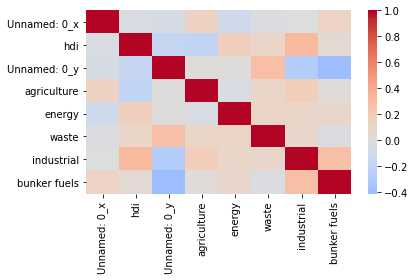

In [12]:
sns.heatmap(analysis_one.corr(method = 'spearman'), center=0, cmap='coolwarm')
plt.tight_layout()
plt.show()

these results might not be very significant in themselves, but we'd like to at least try to construct a model based on this data (given the wealth of what we have, and that there is a known correlation *at the least* between hdi and ghg emissions per capita). along these lines, let's try creating a multivariate linear regression to predict hdi, since hdi is a continuous float from 0-1:

In [13]:
regression1 = LinearRegression().fit(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], analysis_one["hdi"])
print("                Agriculture  Energy      Waste      Industiral   Bunker Fuels")
print("coefficients = {}".format(regression1.coef_))
print("r^2 = {}".format(regression1.score(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], analysis_one["hdi"])))

                Agriculture  Energy      Waste      Industiral   Bunker Fuels
coefficients = [ 0.00708508 -0.00187978 -0.07289289  0.28846484  0.00686723]
r^2 = 0.06860448875673753


In [14]:
# for x in ["agriculture", "energy", "waste", "industrial", "bunker fuels"]:
#     regression1 = LinearRegression().fit(analysis_one[[x]], analysis_one["hdi"])
#     print(x.capitalize() +':')
#     print("coefficients = {}".format(regression1.coef_))
#     print("r^2 = {}".format(regression1.score(analysis_one[[x]], analysis_one["hdi"])))

#### evaluation of significance

already, this data doesn't seem particularly significant, but let's validate that with an evaluation of significance. for this, let's try bootstrapping our regression with n = 500 trials, to try and see how many slopes because of randomness could be more random than the one we got:

In [40]:
# creating the permutation method
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

count = 0

for i in range(500):
    permuted_model = LinearRegression().fit(analysis_one[{"agriculture", "energy", "waste", "industrial", "bunker fuels"}], permute(analysis_one["hdi"]))
    if(np.abs(permuted_model.coef_[0]) > np.abs(regression1.coef_[0])):
        count += 1
                                            
print("{} permuted slopes were of greater magnitude than the observed data.".format(count))
                                            
print("p-value implied: {:.5f}".format(count / 500))

14 permuted slopes were of greater magnitude than the observed data.
p-value implied: 0.02800


that is... exactly what we thought? unfortunately, the implied value is much greater than most p-value cutoffs traditionally used (p = 0.1, p = 0.05, or p = 0.01); as a result, this data doesn't seem to be much better than could be done by random chance :(

## analysis two

Like in analysis one, the data for analysis two has been imported and cleaned already in the data-cleaing file. In this case, the dataset is CIA industry data hand-formatted in Excel, containing the  CIA's ranking of the most important industires for each country's economy. In this file, we've chosen to focus on if each country has a focus on four industires related to fashion: Cotton, Clothing, Garments, Textiles. 

Here is the cleaned data being loaded:

In [16]:
analysis_two=pd.read_csv("analysis_two.csv")

Now we can perform numerical analysis on the analysis two dataframe. The first thing we will do is create a heatmap of correlations in the dataframe. 

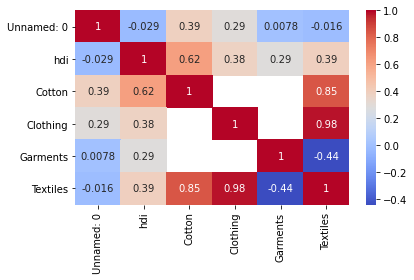

In [17]:
sns.heatmap(analysis_two.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

We want to look at the correlations between hdi and the industry ranks, so we will only consider the first row. We see postive correlations between .29 and .62 for all four variables. The industry rank data is arranged in such a way that the higher the number, the less important that industry is in a counrty's economy. These correlations are showing that fashion related industries are less important to more developed countries. This fits with our intial expectations which were that the fashion industry is more important for less developed countries.

#### scatter Plots:
To visualize these correaltions we will make scatter plots with linear regression lines

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

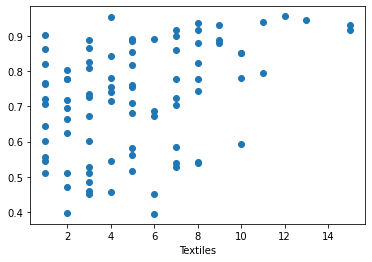

In [18]:
plt.scatter(analysis_two.Textiles, analysis_two.hdi)
plt.xlabel('Textiles')
plt.ylabel

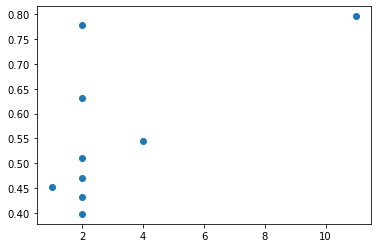

In [19]:
plt.scatter(analysis_two.Cotton, analysis_two.hdi)

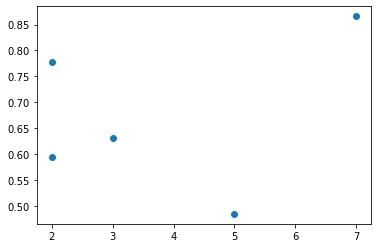

In [20]:
plt.scatter(analysis_two.Garments, analysis_two.hdi)

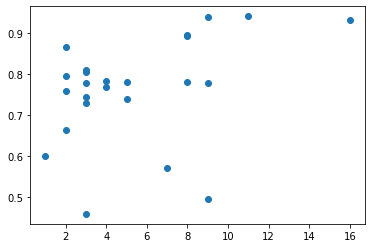

In [21]:
plt.scatter(analysis_two.Clothing, analysis_two.hdi)

Here I'm merging the analysis_one dataframe that contains GHG emissions per sector ('countries', 'agriculture', 'energy', 'waste','industrial','bunker fuels') with the analysis_two df that contains the list of countries and their corresponding hdi and indexes regarding cotton, clothing, garments, and textiles.

In [22]:
analysis_two_all = df_ghgchange.merge(analysis_two, how='left', on='country')
analysis_two_all

,Unnamed: 0_x,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
0,57,Afghanistan,1.772263,-0.107251,-0.021030,0.014195,-0.034173,38041757.0,2019,0.0,0.511,NaN,NaN,NaN,2.0
1,145,Albania,0.753233,0.236036,0.329757,0.017356,-0.010413,2880913.0,2019,1.0,0.795,NaN,2.0,NaN,NaN
2,38,Algeria,1.357395,-0.402759,-0.009059,0.130304,0.013007,43053054.0,2019,2.0,0.748,NaN,NaN,NaN,NaN
3,177,Andorra,-0.648122,1.944365,1.036995,0.000000,0.000000,77146.0,2019,3.0,0.868,NaN,NaN,NaN,NaN
4,47,Angola,0.037706,2.020405,-0.068499,0.035506,0.049960,31825299.0,2019,4.0,0.581,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,35,Uzbekistan,-0.468138,-0.446914,0.030320,0.088534,0.058517,32981715.0,2019,182.0,0.720,NaN,NaN,NaN,1.0
172,171,Vanuatu,0.466850,-0.266772,-1.200472,0.066693,0.033346,299882.0,2019,183.0,0.609,NaN,NaN,NaN,NaN
173,122,Yemen,-0.387492,0.147453,0.011659,0.007544,-0.001029,29161922.0,2019,186.0,0.470,2.0,NaN,NaN,2.0
174,59,Zambia,1.549182,-0.320250,0.029114,0.049829,0.035272,17861034.0,2019,187.0,0.584,NaN,NaN,NaN,7.0


In this cell, we are replacing all empty values with 0 so that we are able to run correlation tests with more data and so we can complete a KMeans clustering further down. 

In [23]:
analysis_two_all_temp = analysis_two_all[['Cotton','Clothing','Garments','Textiles','hdi','energy','bunker fuels','agriculture','industrial','waste']].fillna(0)
analysis_two_all_temp

,Cotton,Clothing,Garments,Textiles,hdi,energy,bunker fuels,agriculture,industrial,waste
0,0.0,0.0,0.0,2.0,0.511,-0.107251,-0.034173,1.772263,0.014195,-0.021030
1,0.0,2.0,0.0,0.0,0.795,0.236036,-0.010413,0.753233,0.017356,0.329757
2,0.0,0.0,0.0,0.0,0.748,-0.402759,0.013007,1.357395,0.130304,-0.009059
3,0.0,0.0,0.0,0.0,0.868,1.944365,0.000000,-0.648122,0.000000,1.036995
4,0.0,0.0,0.0,5.0,0.581,2.020405,0.049960,0.037706,0.035506,-0.068499
...,...,...,...,...,...,...,...,...,...,...
171,0.0,0.0,0.0,1.0,0.720,-0.446914,0.058517,-0.468138,0.088534,0.030320
172,0.0,0.0,0.0,0.0,0.609,-0.266772,0.033346,0.466850,0.066693,-1.200472
173,2.0,0.0,0.0,2.0,0.470,0.147453,-0.001029,-0.387492,0.007544,0.011659
174,0.0,0.0,0.0,7.0,0.584,-0.320250,0.035272,1.549182,0.049829,0.029114


Though we have already generated scatterplots showing the correlation between country industry output vs. hdi, we decided to run a pearson correlation method here so we could generate a table that shows a quantifiable strength of association between all of our variables.

In [24]:
analysis_two_all.corr(method='pearson')

,Unnamed: 0_x,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
Unnamed: 0_x,1.000000,0.003570,0.010272,0.084269,-0.245767,-0.074313,-0.343702,NaN,-0.034148,-0.114833,0.225349,-0.452557,0.746374,-0.017087
agriculture,0.003570,1.000000,0.159097,0.073843,-0.162669,0.032573,-0.015141,NaN,0.145425,-0.094774,-0.393239,-0.322005,0.621798,-0.102082
energy,0.010272,0.159097,1.000000,0.115894,-0.044348,0.166024,0.065008,NaN,-0.061850,0.099588,0.765674,0.263331,-0.009347,0.197165
waste,0.084269,0.073843,0.115894,1.000000,0.023730,0.043180,-0.019987,NaN,0.023466,0.088450,-0.061182,-0.112905,0.817127,-0.036636
industrial,-0.245767,-0.162669,-0.044348,0.023730,1.000000,0.153997,0.090065,NaN,-0.029595,0.206157,0.286376,-0.113893,-0.779732,-0.002842
bunker fuels,-0.074313,0.032573,0.166024,0.043180,0.153997,1.000000,-0.006062,NaN,0.004061,-0.007977,-0.482955,0.257322,-0.424436,-0.095443
PopTotal,-0.343702,-0.015141,0.065008,-0.019987,0.090065,-0.006062,1.000000,NaN,-0.075188,-0.030505,-0.231505,0.349150,-0.249725,-0.130103
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 0_y,-0.034148,0.145425,-0.061850,0.023466,-0.029595,0.004061,-0.075188,NaN,1.000000,-0.020059,0.389003,0.294384,0.007843,-0.015891
hdi,-0.114833,-0.094774,0.099588,0.088450,0.206157,-0.007977,-0.030505,NaN,-0.020059,1.000000,0.618061,0.379034,0.289884,0.394550


some interesting points to keep in mind regarding this output:
- there is a relatively high positive correlation (.765674) between Cotton industry output and energy GHG emissions
- there is also a fairly high positive correlation (.618061) between hdi and cotton industry output.
- in fact, there is actually a smaller, but still present, positive correlation between hdi and clothing industry output, hdi and garments industry output, and hdi and textiles industry output. 
- there is a high positive correlation between Garments industry output and agriculture GHG emissions, and between Garments and waste GHG emissions. 
- apart from the above exceptions, many of the correlations between industry outputs and GHG emissions by sector appear to not be strong associations. This is not what we would initially expect to find considering the general common notion that fast fashion has detrimental environmental effects. 

since the pearson correlations above seem to imply a positive relationship between certain industry outputs and GHG emissions, we want to create regplots for each industry output compared to each GHG emission sector so we can visualize any relationship trends

we'll start with comparing each GHG emission sector to Textile industry output. 

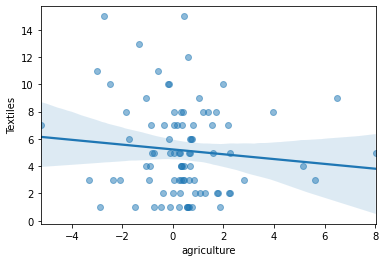

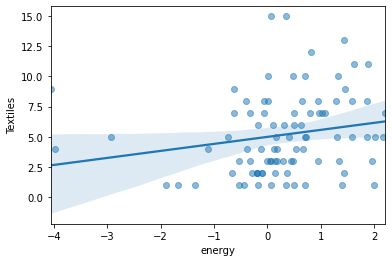

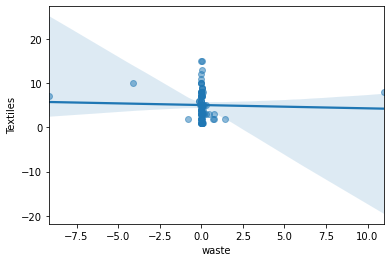

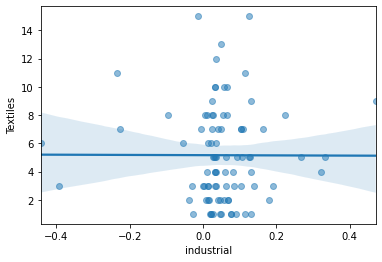

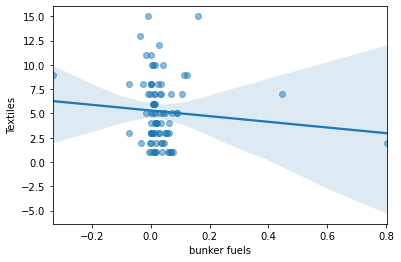

In [25]:
list = ['agriculture','energy','waste','industrial','bunker fuels']
for c in list:
  sns.regplot(x = c, y ='Textiles', data = analysis_two_all, scatter_kws ={'alpha': 0.5}) 
  plt.show()

OOO - what's this? These graphs are a little all over the place but if we examine the Energy Emissions vs. Textiles Index we can see what appears to be a slight positive linear correlation, implying that there is in fact a relationship between the increase in textile industry output and the green house gas emissions per country in the energy sector. This makes complete sense considering that energy GHG emissions are produced from electricity, power, heat,and chemical reactions which are all processes involved in manufacturing textiles on a mass scale. There could also be a very slight positive correlation seen in the industrial GHG Emissions vs. Textiles Index graph which would again make sense for the same reasons previously stated. The other three graphs deliver inconclusive data. 

Next, let's look at the garment industry output vs. each emission sector. 

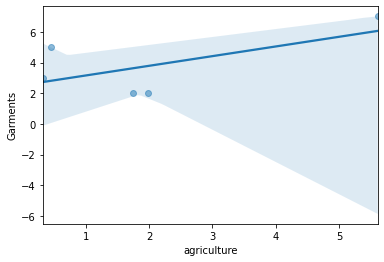

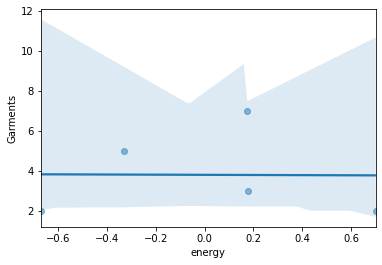

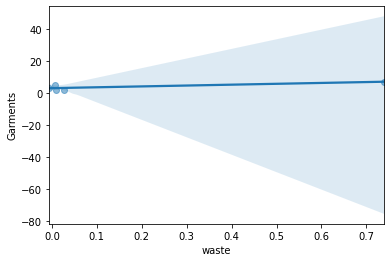

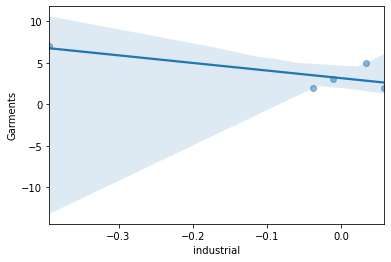

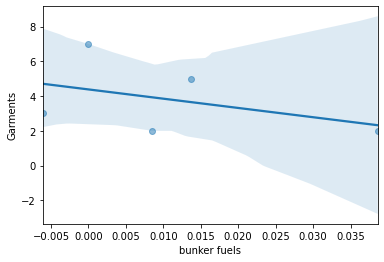

In [26]:
for c in list:
  sns.regplot(x = c, y ='Garments', data = analysis_two_all, scatter_kws ={'alpha': 0.5}) 
  plt.show()

Hmmm these graphs don't seem to be telling us much...Due to the lack of data under Garment indexes, there's not a very clear relationship between Garments and any of the GHG emission sectors, or at least not a relationship discernable from a simple scatterplot.

Now let's examine cotton industry output vs. GHG emission sector

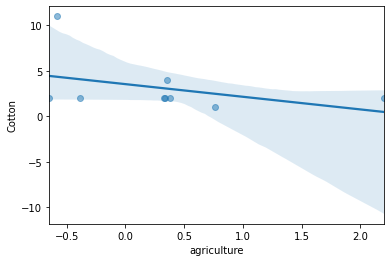

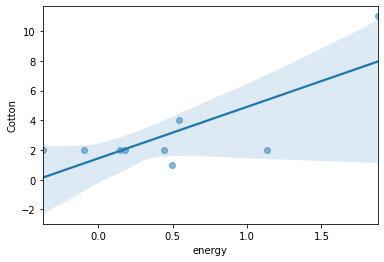

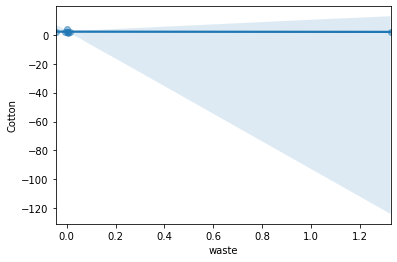

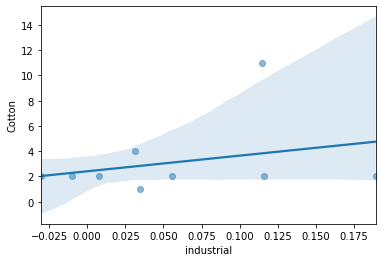

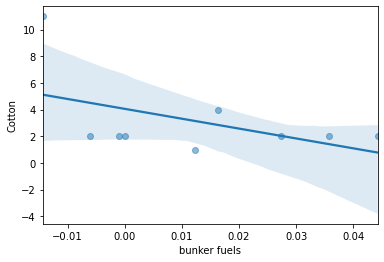

In [27]:
for c in list:
  sns.regplot(x = c, y ='Cotton', data = analysis_two_all, scatter_kws ={'alpha': 0.5}) 
  plt.show()

Uh oh, the lack of data for Cotton indexes seems to be giving us some issues in terms of deciphering a relationship between cotton indexes and GHG emission sectors. 

Finally, we will examine clothing industry output vs. GHG emission sector. 

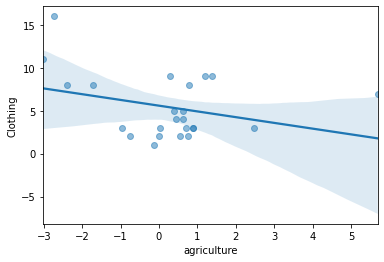

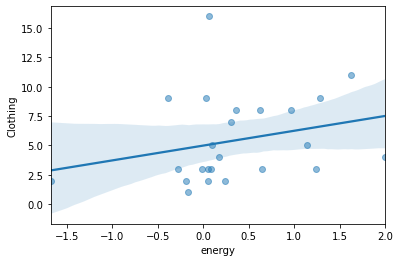

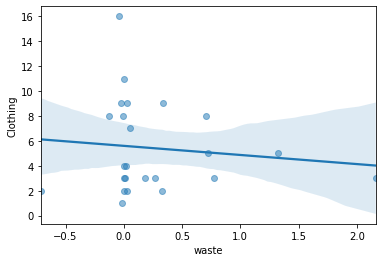

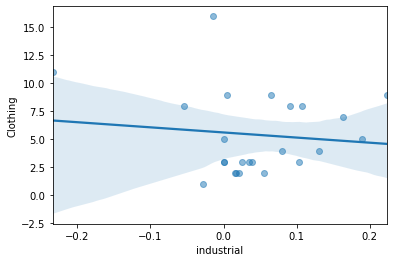

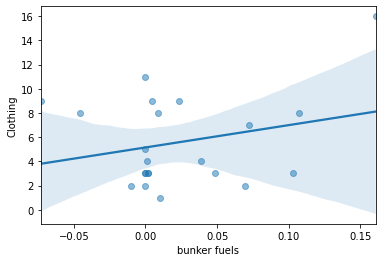

In [28]:
for c in list:
  sns.regplot(x = c, y ='Clothing', data = analysis_two_all, scatter_kws ={'alpha': 0.5}) 
  plt.show()

Hmm what are these graphs telling us? It seems like there is yet another slight positive correlation for Industrial GHG Emissions vs Clothing indexes, and Energy GHG Emissions vs. Clothing indexes. For Agriculture, Bunker Fuels, and Waste, the relationship with Clothing indexes still remains unclear. 

In this cell, we perform KMeans clustering in an attempt to discover the structure/categories in which our data points fall. We are just going to cluster based on variabels related to fashion industry and emissions. We want to see if theres a structure to this data that can indicate the develpoment level of a country.

In [29]:
clustering = KMeans(n_clusters = 5, random_state = 15)
KM = clustering.fit(analysis_two_all_temp[['agriculture',  'energy', 'waste', 'industrial',	
                                           'bunker fuels', 'Cotton', 'Clothing', 'Garments', 'Textiles']])
KM.cluster_centers_

cluster_labels = KM.labels_
print(cluster_labels[:5])
analysis_two_all["cluster_label"] = cluster_labels
analysis_two_all.head(15)


[4 4 4 4 2]


,Unnamed: 0_x,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles,cluster_label
0,57,Afghanistan,1.772263,-0.107251,-0.021030,0.014195,-0.034173,38041757.0,2019,0.0,0.511,NaN,NaN,NaN,2.0,4
1,145,Albania,0.753233,0.236036,0.329757,0.017356,-0.010413,2880913.0,2019,1.0,0.795,NaN,2.0,NaN,NaN,4
2,38,Algeria,1.357395,-0.402759,-0.009059,0.130304,0.013007,43053054.0,2019,2.0,0.748,NaN,NaN,NaN,NaN,4
3,177,Andorra,-0.648122,1.944365,1.036995,0.000000,0.000000,77146.0,2019,3.0,0.868,NaN,NaN,NaN,NaN,4
4,47,Angola,0.037706,2.020405,-0.068499,0.035506,0.049960,31825299.0,2019,4.0,0.581,NaN,NaN,NaN,5.0,2
5,169,Antigua and Barbuda,2.471297,1.235648,2.162385,0.102971,0.102971,97115.0,2019,5.0,0.778,NaN,3.0,NaN,NaN,4
6,20,Argentina,-1.060279,0.660329,0.066547,0.131530,0.036400,44780675.0,2019,6.0,0.845,NaN,NaN,NaN,4.0,4
7,146,Armenia,0.098048,0.446289,0.412479,0.023667,NaN,2957728.0,2019,7.0,0.776,NaN,NaN,NaN,NaN,4
8,14,Australia,0.086100,0.044836,-0.191246,0.418598,0.149187,25203200.0,2019,8.0,0.944,NaN,NaN,NaN,NaN,4
9,73,Austria,-1.109981,-0.243436,0.025684,-0.031267,0.036850,8955108.0,2019,9.0,0.922,NaN,NaN,NaN,NaN,4


In [30]:
analysis_two_all.groupby('cluster_label').count()

,Unnamed: 0_x,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
cluster_label,,,,,,,,,,,,,,,
0,8,8,8,8,8,8,8,8,8,8,8,0,8,0,6
1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2,39,39,39,39,37,39,38,39,39,39,39,2,0,1,39
3,15,15,15,15,15,15,12,15,15,15,15,0,1,1,3
4,113,113,113,113,113,111,101,113,113,105,105,7,15,3,41


In [31]:
mean_clusterlabel = analysis_two_all.groupby('cluster_label').mean()
mean_clusterlabel.head()

,Unnamed: 0_x,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
cluster_label,,,,,,,,,,,,,,
0,73.625000,-0.777702,0.569816,0.109682,0.023767,0.023282,3.778229e+07,2019.0,97.750000,0.831125,NaN,9.75,NaN,9.166667
1,90.000000,65.614545,2.552921,0.074647,-0.432951,0.149294,6.698210e+05,2019.0,156.000000,0.567000,NaN,NaN,NaN,NaN
2,80.820513,0.335965,0.622913,-0.037821,0.051712,0.025901,6.110155e+07,2019.0,87.256410,0.747205,6.000000,NaN,2.000000,7.589744
3,102.066667,7.155556,1.261093,0.761402,0.143652,0.013105,5.120459e+06,2019.0,106.866667,0.767133,NaN,7.00,7.000000,4.000000
4,105.823009,0.184015,-0.106917,0.112192,0.051639,0.042387,3.566309e+07,2019.0,92.695238,0.700133,2.285714,3.00,3.333333,2.341463


Above we have looked at some summary statistics of our clustered data. We see that each cluster has a totally different number of countries assigned to it ranging from label 1 with one country to label 4 with 117 countries. Next we have summary stastics for each of the clusters. We are going to speifically pay attention to the hdi column whcih gives us the average hdi for each label. 

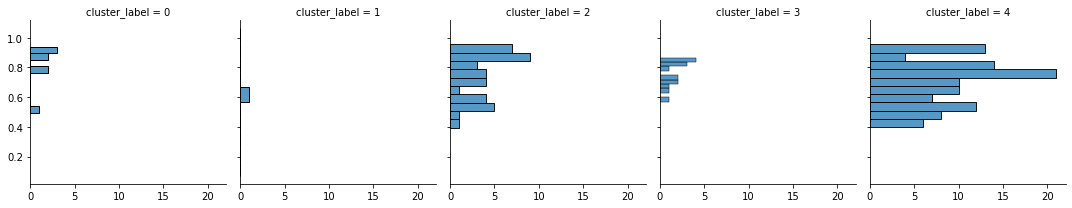

In [32]:
g = sns.FacetGrid(data=analysis_two_all, col="cluster_label")
g.map_dataframe(sns.histplot, y="hdi", bins=10);

In [33]:
analysis_two_all.groupby('cluster_label').min()

,Unnamed: 0_x,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
cluster_label,,,,,,,,,,,,,,,
0,10,Denmark,-3.021547,-0.393412,-0.124525,-0.233893,-0.072900,440377.0,2019,46.0,0.496,NaN,8.0,NaN,6.0
1,90,Solomon Islands,65.614545,2.552921,0.074647,-0.432951,0.149294,669821.0,2019,156.0,0.567,NaN,NaN,NaN,NaN
2,0,Angola,-5.220250,-4.064264,-9.136611,-0.442260,-0.332775,1198574.0,2019,4.0,0.394,1.0,NaN,2.0,5.0
3,13,Bahrain,4.999722,-3.975030,0.000000,-0.393342,-0.144150,18001.0,2019,12.0,0.571,NaN,7.0,7.0,3.0
4,2,Afghanistan,-6.311774,-9.771516,-9.412631,-0.487748,-0.127491,1614.0,2019,0.0,0.397,2.0,1.0,2.0,1.0


In [34]:
analysis_two_all.groupby('cluster_label').max()

,Unnamed: 0_x,country,agriculture,energy,waste,industrial,bunker fuels,PopTotal,Time,Unnamed: 0_y,hdi,Cotton,Clothing,Garments,Textiles
cluster_label,,,,,,,,,,,,,,,
0,167,United Kingdom,1.375250,1.623389,0.703942,0.224144,0.160669,1.275755e+08,2019,179.0,0.940,NaN,16.0,NaN,15.0
1,90,Solomon Islands,65.614545,2.552921,0.074647,-0.432951,0.149294,6.698210e+05,2019,156.0,0.567,NaN,NaN,NaN,NaN
2,153,Zambia,6.483786,2.211745,10.997501,0.470804,0.445595,1.433784e+09,2019,187.0,0.957,11.0,NaN,2.0,15.0
3,182,Zimbabwe,13.827337,7.655175,3.921818,0.331913,0.180080,3.426853e+07,2019,188.0,0.866,NaN,7.0,7.0,5.0
4,192,Yemen,3.421024,5.286408,2.566060,0.418598,0.857924,1.366418e+09,2019,186.0,0.955,4.0,5.0,5.0,4.0


##### let's see if our data is at all significant...

here we decided to run a linear regression model in order to further examine the relationship between different countries' industry outputs and respective hdi values

In [35]:
regression1 = LinearRegression().fit(analysis_two_all_temp[{"Cotton", "Clothing", "Garments", "Textiles"}], analysis_two_all_temp["hdi"])
print("                Cotton  Clothing      Garments      Textiles")
print("coefficients = {}".format(regression1.coef_))
print("r^2 = {}".format(regression1.score(analysis_two_all_temp[{"Cotton", "Clothing", "Garments", "Textiles"}], analysis_two_all_temp["hdi"])))

                Cotton  Clothing      Garments      Textiles
coefficients = [-0.01653906  0.01456267  0.00946882  0.00058075]
r^2 = 0.08096785068956658


our r^2 represents the proportion of variation in the industry output that can be attributed to the hdi value. In other words, our r^2 measures the strength of the relationship between our two variables, with a value of 1 implying a perfect positive linear association, a value of 0 implying no association, and a value of -1 implying a perfect negative linear association. Since our r^2 value is 0.08097, this implies that there is an almost negligable positive association between country industry output and hdi. 

In [43]:
# creating the permutation method
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

count = 0

for i in range(500):
    permuted_model = LinearRegression().fit(analysis_two_all_temp[{"Cotton", "Clothing", "Garments", "Textiles"}], permute(analysis_two_all_temp["hdi"]))
    if(np.abs(permuted_model.coef_[0]) > np.abs(regression1.coef_[0])):
        count += 1
                                            
print("{} permuted slopes were of greater magnitude than the observed data.".format(count))
                                            
print("p-value implied: {:.5f}".format(count / 500))

132 permuted slopes were of greater magnitude than the observed data.
p-value implied: 0.26400


Disheartening yet unsuprising...our p-value is relatively large meaning that we do not have sufficient evidence to conclude that there is a relationship between industry output and hdi. 

#### interpretation and conclusions
Analysis One:
reflecting now (after completing the data analysis, and the evaluation of significance), it seems as if much of the prior data analysis isn't that significant. while we've found some (slightly) interesting trends, such as how ghg emissions are (somewhat) negatively correlated with hdi, we haven't found much else; the multivariate linear regression also did not return a statistically-significant slope. in this sense, i don't think that our results lined up with our initial expectations, that there would be a high correlation between hdi and certain industries' emissions; perhaps this is a quirk of our own analysis? it seems likely that climatewatch.org would be incentivized to publish such data if they proved significant connection between emissions and a countries "developedness": perhaps this sort of "mangling" of the data is how climate-change-related misinformation (and false statistics) spreads? 

Analysis Two:
We initially suspected to find a large positive correlation between different industry outputs and GHG emission sectors considering the amount of energy, waste, and fuel that goes into mass producing fast fashion collections. After performing our intial scatterplots however, and comparing with the generated pearson correlations, we see largely small negative correlations between industry outputs and GHG emission sectors with the following exceptions that exhibit a faint positive correlation: Clothing vs. Energy emissions , Clothing vs. Bunker Fuels, and Textiles vs. Energy. Additionally, there was a fairly large positive correlation for Cotton vs. Energy emissions, Garments vs. Agriculture emissions, and Garments vs. Waste emissions. In examining the relationship between HDI and industry output, we see a positive correlation between HDI and every industry output, as expected, with a specifically large positive correlation between HDI and Cotton. Unfortunately, because there is such little data for Cotton output and Garment output, any correlation relating to these two variables is most likely bias, and thus inconclusive. Likewise, though our r^2 value (.08097) suggests a small positive correlation in industry output and HDI, the value is so slightly above zero that whatever correlation exists appears to be miniscule. Furthermore, our generated p-value implies that there is insufficient evidence to conclude that there is a relationship between industry output and HDI. While we began our investigation hoping to discover a tangible relationship for emission sectors vs.industry output, and output vs. hdi, it is disap




#### limitations

there are certainly many limitations to this data: at the very least, part of the scope of this analysis seems limited, since it's about *greenhouse gas emissions by industry* and not pointing directly at fashion itself. but, looking into the data itself, it seems like there could be limitations just based on scale (in megatons, or with population in thousands); given that some countries inevitably get rounded down (to ~ 0 emissions), it seems harder to create significant analyses. this is unsatisfying; however, we are unsure how this might otherwise be solved (since all data will come with this issue as well).

The main limitation we are faced with in the second analysis is a lack of data in quantifying the fashion industry into different sectors (cotton, garments, textiles, clothing). There are limitations to the CIA data, each countries industires are not listed in the same way. When using the CIA website to gather data we had to use our own discretion to best make sure that we were keeping our data consistent. The data is also listed in a non numerical way, and we applied numerical analysis to it. The industries are ranked by size, so comparing the rank from one country againt the next will not show the magnitude of how that industry ranks against the countries other industires. This could be fixed with a data set that lists industries by economic output, but this would require another large data set and as much work as we put into our primary data set.

#### acknowledgements

we'd like to thank our ta, anna, for her constant support for this project, and for many early-rising tas showing up in rhodes to answer the questions we had! :)